<a href="https://colab.research.google.com/github/ussvarma/Cricket-Team/blob/main/Artificial_Neural_Network_for_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
dataset=pd.read_excel("Folds5x2_pp.xlsx")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
print(x)
print(y)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann=tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu')) 


### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))



In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))



In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))



### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer="sgd",loss='mean_squared_error' )

### Training the ANN model on the Training set

In [ ]:
history=ann.fit(x_train,y_train,batch_size=32,epochs=100)

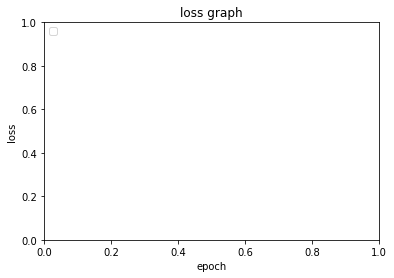

In [ ]:
#plt.plot(history.history['loss'])
plt.title('loss graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

60/60 [==============================] - 0s 1ms/step - loss: 331785.5938


{'loss': 331785.59375}

### Predicting the results of the Test set

In [ ]:
y_pred=ann.predict(x_test)
np.set_printoptions(precision=2) 
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)) #we are converting into column matrix, verticalconcatenation=1,horizontalconcatenation=0

[[-114.32  431.23]
 [-121.29  460.01]
 [-119.79  461.14]
 ...
 [-122.15  473.26]
 [-124.26  438.  ]
 [-124.    463.28]]


#second one


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train2, x_test2, y_train2,y_test2=train_test_split(x,y,test_size=0.1,random_state=0)

In [ ]:
ann2=tf.keras.models.Sequential()

In [ ]:
ann2.add(tf.keras.layers.Dense(units=10,activation="relu"))

In [ ]:
ann2.add(tf.keras.layers.Dense(units=4,activation='relu'))

In [ ]:
ann2.add(tf.keras.layers.Dense(units=20,activation='relu'))

In [ ]:
ann2.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann2.compile(optimizer="SGD",loss='mean_absolute_error' )

In [ ]:
#history2=ann2.fit(x_train2,y_train2,batch_size=32,epochs=200)

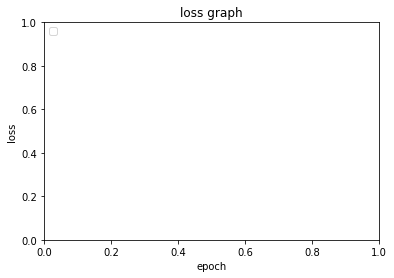

In [ ]:
#plt.plot(history2.history['loss'])
plt.title('loss graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

##lets try above model with ideal learning *rate*

In [ ]:
from sklearn.model_selection import train_test_split
x_train2a, x_test2a, y_train2a,y_test2a=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train2a, x_test2a, y_train2a,y_test2a=train_test_split(x,y,test_size=0.1,random_state=0)

#####same model as above

In [ ]:
ann_model_2a=tf.keras.models.Sequential()
ann_model_2a.add(tf.keras.layers.Dense(units=10,activation="relu"))

In [ ]:
ann_model_2a.add(tf.keras.layers.Dense(units=4,activation="relu"))
ann_model_2a.add(tf.keras.layers.Dense(units=20,activation="relu"))


In [ ]:
ann_model_2a.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann_model_2a.compile(optimizer="SGD",loss='mean_absolute_error' )

#####creating a learning callback

In [ ]:
lr_schedular=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))
history_2a=ann_model_2a.fit(x_train2a,y_train2a,batch_size=32,epochs=100,callbacks=[lr_schedular])

Epoch 1/100
270/270 [==============================] - 2s 3ms/step - loss: 64.1862 - lr: 1.0000e-04
Epoch 2/100
270/270 [==============================] - 1s 3ms/step - loss: 57.9570 - lr: 1.1220e-04
Epoch 3/100
270/270 [==============================] - 1s 4ms/step - loss: 63.0892 - lr: 1.2589e-04
Epoch 4/100
270/270 [==============================] - 1s 3ms/step - loss: 71.8021 - lr: 1.4125e-04
Epoch 5/100
270/270 [==============================] - 1s 3ms/step - loss: 86.4709 - lr: 1.5849e-04
Epoch 6/100
270/270 [==============================] - 1s 3ms/step - loss: 103.3689 - lr: 1.7783e-04
Epoch 7/100
270/270 [==============================] - 1s 3ms/step - loss: 121.2493 - lr: 1.9953e-04
Epoch 8/100
270/270 [==============================] - 1s 2ms/step - loss: 123.5900 - lr: 2.2387e-04
Epoch 9/100
270/270 [==============================] - 1s 3ms/step - loss: 141.7645 - lr: 2.5119e-04
Epoch 10/100
270/270 [==============================] - 1s 2ms/step - loss: 205.9242 - lr: 2.818

###### plotting learning rate vs loss

Text(0.5, 1.0, 'learning rate vs loos')

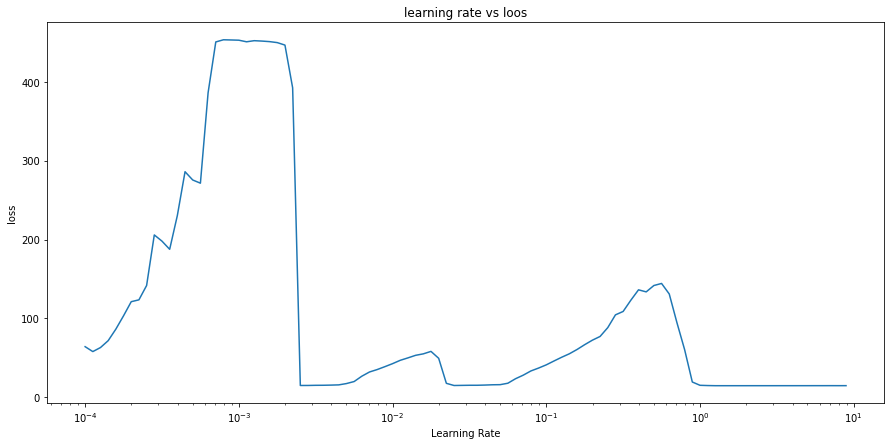

In [ ]:
lrs=1e-4*(10**(np.arange(100)/20))
plt.figure(figsize=(15,7))
plt.semilogx(lrs,history_2a.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('loss')
plt.title('learning rate vs loos')

#####observations:
      1.sgd is slower in computation.
      2intializing with proper learning rate helps in faster computation

#third one


In [ ]:
x_train3, x_test3, y_train3,y_test3=train_test_split(x,y,test_size=0.1,random_state=0)

In [ ]:
ann3=tf.keras.models.Sequential()

In [ ]:
ann3.add(tf.keras.layers.Dense(units=2,activation="relu"))

In [ ]:
ann3.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann3.compile(optimizer="adam",loss='mean_absolute_error' )

In [ ]:
ann3.fit(x_train3,y_train3,batch_size=32,epochs=100)

Epoch 1/100
270/270 [==============================] - 1s 1ms/step - loss: 454.1702
Epoch 2/100
270/270 [==============================] - 0s 1ms/step - loss: 453.9004
Epoch 3/100
270/270 [==============================] - 0s 1ms/step - loss: 453.6304
Epoch 4/100
270/270 [==============================] - 0s 1ms/step - loss: 453.3603
Epoch 5/100
270/270 [==============================] - 0s 1ms/step - loss: 453.0904
Epoch 6/100
270/270 [==============================] - 0s 1ms/step - loss: 452.8202
Epoch 7/100
270/270 [==============================] - 0s 1ms/step - loss: 452.5504
Epoch 8/100
270/270 [==============================] - 0s 1ms/step - loss: 452.2803
Epoch 9/100
270/270 [==============================] - 0s 1ms/step - loss: 452.0104
Epoch 10/100
270/270 [==============================] - 0s 1ms/step - loss: 451.7403
Epoch 11/100
270/270 [==============================] - 0s 1ms/step - loss: 451.4704
Epoch 12/100
270/270 [==============================] - 0s 1ms/step - loss

#fourth

In [ ]:
x_train4, x_test4, y_train4,y_test4=train_test_split(x,y,test_size=0.1,random_state=0)

In [ ]:
ann4=tf.keras.models.Sequential()

In [ ]:
ann4.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann4.compile(optimizer="adam",loss='mean_absolute_percentage_error')

In [ ]:
ann4.fit(x_train4,y_train4,batch_size=32,epochs=100)

Epoch 1/100
270/270 [==============================] - 1s 1ms/step - loss: 247.9407
Epoch 2/100
270/270 [==============================] - 0s 1ms/step - loss: 178.8060
Epoch 3/100
270/270 [==============================] - 0s 1ms/step - loss: 109.6778
Epoch 4/100
270/270 [==============================] - 0s 1ms/step - loss: 40.6302
Epoch 5/100
270/270 [==============================] - 0s 1ms/step - loss: 5.7115
Epoch 6/100
270/270 [==============================] - 0s 1ms/step - loss: 5.4793
Epoch 7/100
270/270 [==============================] - 0s 1ms/step - loss: 5.3763
Epoch 8/100
270/270 [==============================] - 0s 1ms/step - loss: 5.2579
Epoch 9/100
270/270 [==============================] - 0s 1ms/step - loss: 5.1195
Epoch 10/100
270/270 [==============================] - 0s 1ms/step - loss: 4.9653
Epoch 11/100
270/270 [==============================] - 0s 1ms/step - loss: 4.7975
Epoch 12/100
270/270 [==============================] - 0s 1ms/step - loss: 4.6104
Epoch 